In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import (
    PolynomialFeatures, 
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [552]:
df = pd.read_csv("phones-v1.csv")

In [553]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


In [554]:
df.info()
# tie sho se object, bool ili neso drugo trebit da se napraet int ili float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          1011 non-null   object 
 1   Model          946 non-null    object 
 2   Storage (GB)   1011 non-null   int64  
 3   RAM (GB)       1011 non-null   int64  
 4   Launch         1011 non-null   object 
 5   Dimensions     1011 non-null   object 
 6   Weight (g)     1011 non-null   float64
 7   Display Type   1011 non-null   object 
 8   Display Size   1011 non-null   float64
 9   OS             1011 non-null   object 
 10  NFC            1011 non-null   bool   
 11  Battery (mAh)  963 non-null    float64
 12  CPU            1011 non-null   object 
 13  Year           1011 non-null   int64  
 14  PPI Density    1011 non-null   int64  
 15  Price Range    996 non-null    object 
dtypes: bool(1), float64(3), int64(4), object(8)
memory usage: 119.6+ KB


In [555]:
df.isna().sum()

Brand             0
Model            65
Storage (GB)      0
RAM (GB)          0
Launch            0
Dimensions        0
Weight (g)        0
Display Type      0
Display Size      0
OS                0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
dtype: int64

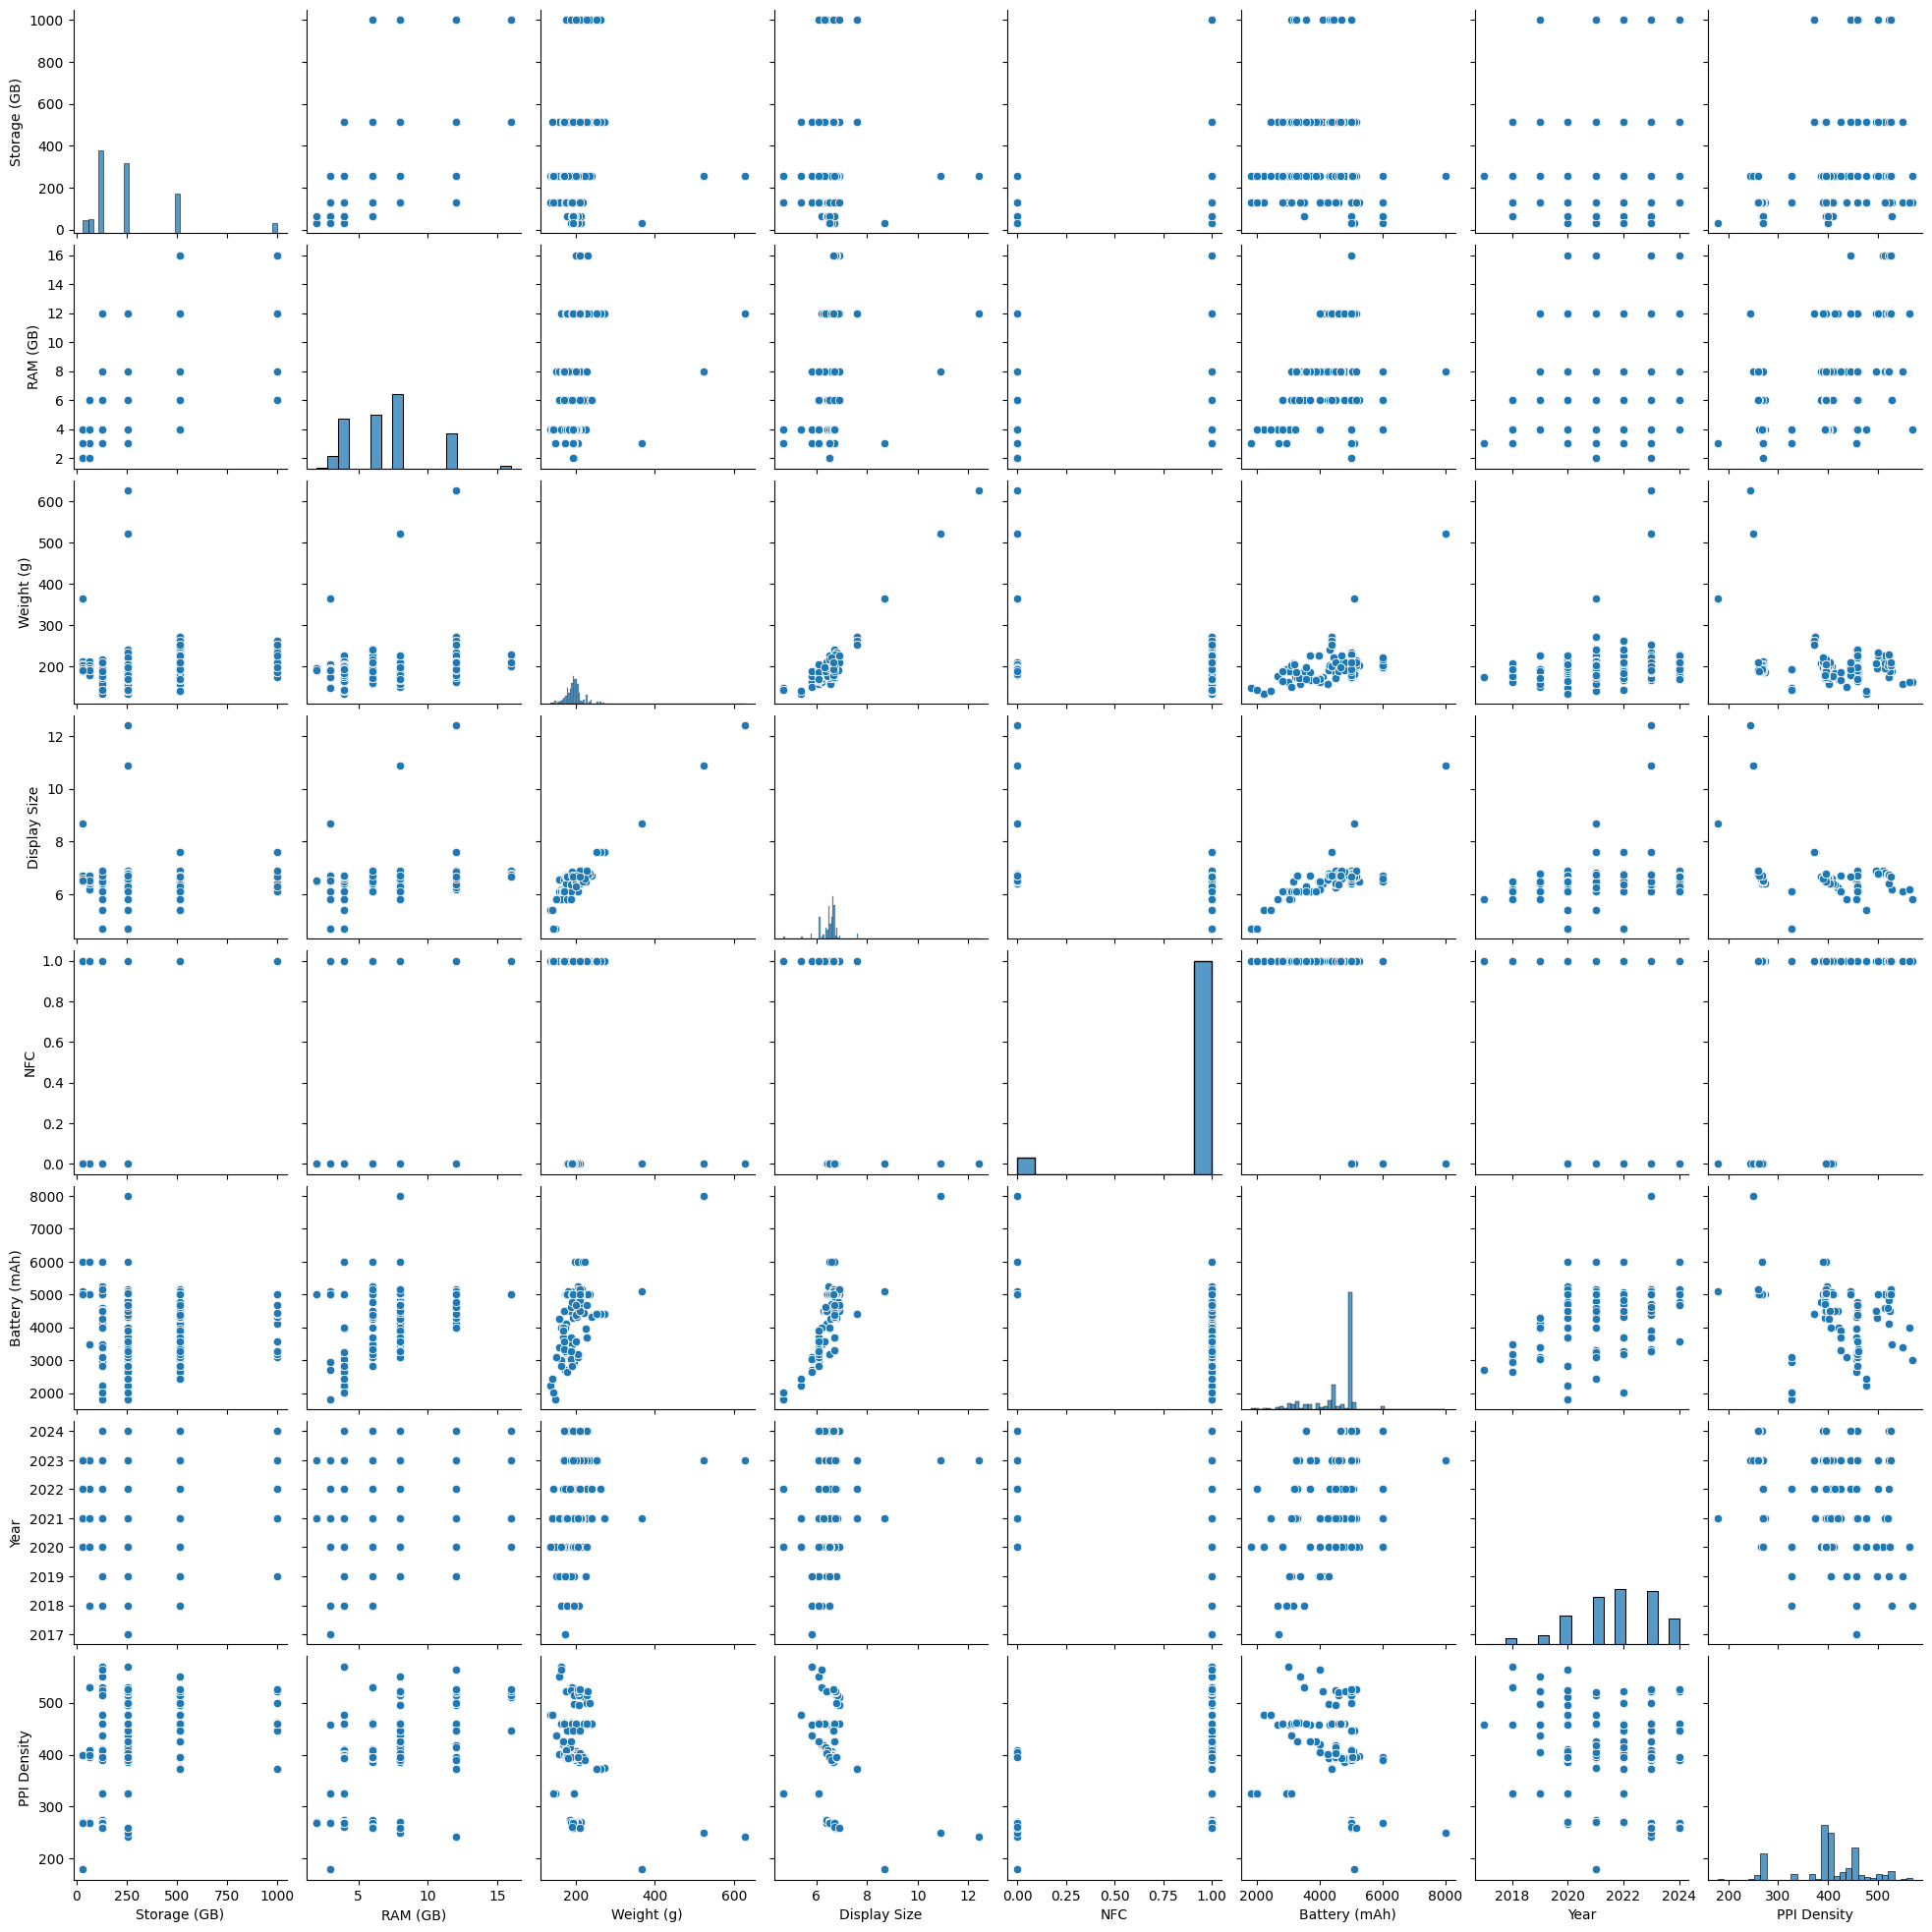

In [556]:
sns.pairplot(df)

In [557]:
df["Brand"].value_counts()

Brand
Xiaomi     427
Samsung    390
Apple      194
Name: count, dtype: int64

In [558]:
one_hot_encoded_values = pd.get_dummies(df["Brand"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
# axis=1 znacit dodaj ko kolona, axis=0 znacit dodaj ko redica 
df.drop(columns="Brand", inplace=True)

In [559]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [560]:
df["Model"].value_counts()

Model
Samsung Galaxy Z Fold4         10
Xiaomi Poco M5s                10
Apple iPhone 15 Pro            10
Xiaomi Redmi Note 12 4G        10
Samsung Galaxy S22 Ultra 5G    10
                               ..
Xiaomi Redmi 12 5G              1
Xiaomi Mix Flip                 1
Xiaomi Redmi A3x                1
Samsung Galaxy A06              1
Xiaomi 14T Pro                  1
Name: count, Length: 215, dtype: int64

In [561]:
df.drop(columns="Model", inplace=True)
df.head()

,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [562]:
df.drop(columns="Launch", inplace=True)
df.head()

,Storage (GB),RAM (GB),Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [563]:
df["Display Type"].value_counts()

Display Type
AMOLED    535
LCD       299
OLED      177
Name: count, dtype: int64

In [564]:
one_hot_encoded_values = pd.get_dummies(df["Display Type"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="Display Type", inplace=True)

In [565]:
df.head()

,Storage (GB),RAM (GB),Dimensions,Weight (g),Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,AMOLED,LCD,OLED
0,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,False,False,True
1,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,False,False,True
2,64,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,True,False,False
3,128,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,True,False,False
4,256,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,True,False,False


In [566]:
df["OS"].value_counts()

OS
Android    817
iOS        194
Name: count, dtype: int64

In [567]:
one_hot_encoded_values = pd.get_dummies(df["OS"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="OS", inplace=True)

In [568]:
df.isna().sum()

Storage (GB)      0
RAM (GB)          0
Dimensions        0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
dtype: int64

In [569]:
df.head()

,Storage (GB),RAM (GB),Dimensions,Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS
0,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,5.8,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,False,False,True,False,True
1,256,3,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,5.8,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,False,False,True,False,True
2,64,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,True,3500.0,Octa-Core,2018,529,low price,False,True,False,True,False,False,True,False
3,128,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,True,False,False,True,False
4,256,6,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,6.2,True,3500.0,Octa-Core,2018,529,high price,False,True,False,True,False,False,True,False


In [570]:
df["Dimensions"] = df["Dimensions"].apply(
    lambda dim: dim.split(" mm ")[0].split(" x ") if not pd.isna(dim) else np.nan
)  
df[["Width", "Height", "Thickness"]] = pd.DataFrame(df["Dimensions"].tolist(), index=df.index)
#Ова му кажува на новиот DataFrame (левата страна) да ги користи истите редови (index) како оригиналниот df
df.drop(columns="Dimensions", inplace=True)

In [571]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,high price,...,False,False,False,False,True,False,True,143.6,70.9,7.7
1,256,3,174.0,5.8,True,2716.0,Hexa-Core,2017,458,low price,...,False,False,False,False,True,False,True,143.6,70.9,7.7
2,64,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,low price,...,True,False,True,False,False,True,False,158.1,73.8,8.5
3,128,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,medium price,...,True,False,True,False,False,True,False,158.1,73.8,8.5
4,256,6,189.0,6.2,True,3500.0,Octa-Core,2018,529,high price,...,True,False,True,False,False,True,False,158.1,73.8,8.5


In [572]:
df["CPU"].value_counts()

CPU
Octa-Core    809
Hexa-Core    194
Quad-Core      8
Name: count, dtype: int64

In [573]:
df.isna().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
Width             0
Height            0
Thickness         0
dtype: int64

In [574]:
categories = ["Quad-Core", "Hexa-Core", "Octa-Core"]
ordinal_encoder = OrdinalEncoder(categories=[categories])
encoded_values = ordinal_encoder.fit_transform(df[["CPU"]])
df["CPU"] = encoded_values

In [575]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,True,2716.0,1.0,2017,458,high price,...,False,False,False,False,True,False,True,143.6,70.9,7.7
1,256,3,174.0,5.8,True,2716.0,1.0,2017,458,low price,...,False,False,False,False,True,False,True,143.6,70.9,7.7
2,64,6,189.0,6.2,True,3500.0,2.0,2018,529,low price,...,True,False,True,False,False,True,False,158.1,73.8,8.5
3,128,6,189.0,6.2,True,3500.0,2.0,2018,529,medium price,...,True,False,True,False,False,True,False,158.1,73.8,8.5
4,256,6,189.0,6.2,True,3500.0,2.0,2018,529,high price,...,True,False,True,False,False,True,False,158.1,73.8,8.5


In [576]:
ordinal_encoder.categories_

[array(['Quad-Core', 'Hexa-Core', 'Octa-Core'], dtype=object)]

In [577]:
df["CPU"].value_counts()

CPU
2.0    809
1.0    194
0.0      8
Name: count, dtype: int64

In [578]:
df["Price Range"].value_counts()

Price Range
medium price    778
high price      112
low price       106
Name: count, dtype: int64

In [579]:
df.isna().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
Apple             0
Samsung           0
Xiaomi            0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
Width             0
Height            0
Thickness         0
dtype: int64

In [580]:
df = df.dropna(subset=["Price Range"], axis=0)
# axis=0 znacit izbrisi redica 

In [581]:
df.isna().sum()

Storage (GB)      0
RAM (GB)          0
Weight (g)        0
Display Size      0
NFC               0
Battery (mAh)    47
CPU               0
Year              0
PPI Density       0
Price Range       0
Apple             0
Samsung           0
Xiaomi            0
AMOLED            0
LCD               0
OLED              0
Android           0
iOS               0
Width             0
Height            0
Thickness         0
dtype: int64

In [582]:
categories = ["low price", "medium price", "high price"]
ordinal_encoder = OrdinalEncoder(categories=[categories])
encoded_values = ordinal_encoder.fit_transform(df[["Price Range"]])
df["Price Range"] = encoded_values

In [583]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,True,2716.0,1.0,2017,458,2.0,...,False,False,False,False,True,False,True,143.6,70.9,7.7
1,256,3,174.0,5.8,True,2716.0,1.0,2017,458,0.0,...,False,False,False,False,True,False,True,143.6,70.9,7.7
2,64,6,189.0,6.2,True,3500.0,2.0,2018,529,0.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5
3,128,6,189.0,6.2,True,3500.0,2.0,2018,529,1.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5
4,256,6,189.0,6.2,True,3500.0,2.0,2018,529,2.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5


<Axes: ylabel='Frequency'>

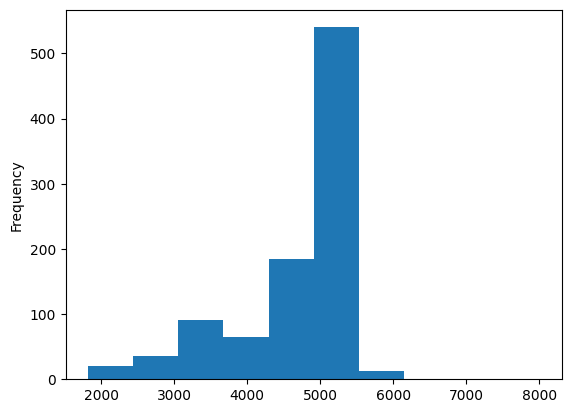

In [584]:
df["Battery (mAh)"].plot.hist()

In [585]:
knn_imputer = KNNImputer(n_neighbors=5)
df["Battery (mAh)"] = knn_imputer.fit_transform(df[["Battery (mAh)"]])
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,True,2716.0,1.0,2017,458,2.0,...,False,False,False,False,True,False,True,143.6,70.9,7.7
1,256,3,174.0,5.8,True,2716.0,1.0,2017,458,0.0,...,False,False,False,False,True,False,True,143.6,70.9,7.7
2,64,6,189.0,6.2,True,3500.0,2.0,2018,529,0.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5
3,128,6,189.0,6.2,True,3500.0,2.0,2018,529,1.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5
4,256,6,189.0,6.2,True,3500.0,2.0,2018,529,2.0,...,True,False,True,False,False,True,False,158.1,73.8,8.5


In [586]:
df.isna().sum()

Storage (GB)     0
RAM (GB)         0
Weight (g)       0
Display Size     0
NFC              0
Battery (mAh)    0
CPU              0
Year             0
PPI Density      0
Price Range      0
Apple            0
Samsung          0
Xiaomi           0
AMOLED           0
LCD              0
OLED             0
Android          0
iOS              0
Width            0
Height           0
Thickness        0
dtype: int64

In [587]:
cols = ["NFC", "Apple", "Samsung", "Xiaomi", "AMOLED", "LCD", "OLED", "Android", "iOS"]
for col in cols:
    df[col] = df[col].astype(int) 

In [588]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,1,2716.0,1.0,2017,458,2.0,...,0,0,0,0,1,0,1,143.6,70.9,7.7
1,256,3,174.0,5.8,1,2716.0,1.0,2017,458,0.0,...,0,0,0,0,1,0,1,143.6,70.9,7.7
2,64,6,189.0,6.2,1,3500.0,2.0,2018,529,0.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5
3,128,6,189.0,6.2,1,3500.0,2.0,2018,529,1.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5
4,256,6,189.0,6.2,1,3500.0,2.0,2018,529,2.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5


In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1010
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Storage (GB)   996 non-null    int64  
 1   RAM (GB)       996 non-null    int64  
 2   Weight (g)     996 non-null    float64
 3   Display Size   996 non-null    float64
 4   NFC            996 non-null    int64  
 5   Battery (mAh)  996 non-null    float64
 6   CPU            996 non-null    float64
 7   Year           996 non-null    int64  
 8   PPI Density    996 non-null    int64  
 9   Price Range    996 non-null    float64
 10  Apple          996 non-null    int64  
 11  Samsung        996 non-null    int64  
 12  Xiaomi         996 non-null    int64  
 13  AMOLED         996 non-null    int64  
 14  LCD            996 non-null    int64  
 15  OLED           996 non-null    int64  
 16  Android        996 non-null    int64  
 17  iOS            996 non-null    int64  
 18  Width         

In [590]:
df["Thickness"] = df["Thickness"].apply(
    lambda dim: dim.replace(" mm", "") if not pd.isna(dim) else np.nan
)

In [591]:
cols = ["Width", "Height", "Thickness"]
for col in cols:
    df[col] = df[col].astype(float) 

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1010
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Storage (GB)   996 non-null    int64  
 1   RAM (GB)       996 non-null    int64  
 2   Weight (g)     996 non-null    float64
 3   Display Size   996 non-null    float64
 4   NFC            996 non-null    int64  
 5   Battery (mAh)  996 non-null    float64
 6   CPU            996 non-null    float64
 7   Year           996 non-null    int64  
 8   PPI Density    996 non-null    int64  
 9   Price Range    996 non-null    float64
 10  Apple          996 non-null    int64  
 11  Samsung        996 non-null    int64  
 12  Xiaomi         996 non-null    int64  
 13  AMOLED         996 non-null    int64  
 14  LCD            996 non-null    int64  
 15  OLED           996 non-null    int64  
 16  Android        996 non-null    int64  
 17  iOS            996 non-null    int64  
 18  Width         

In [593]:
df.head()

,Storage (GB),RAM (GB),Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,...,Samsung,Xiaomi,AMOLED,LCD,OLED,Android,iOS,Width,Height,Thickness
0,256,3,174.0,5.8,1,2716.0,1.0,2017,458,2.0,...,0,0,0,0,1,0,1,143.6,70.9,7.7
1,256,3,174.0,5.8,1,2716.0,1.0,2017,458,0.0,...,0,0,0,0,1,0,1,143.6,70.9,7.7
2,64,6,189.0,6.2,1,3500.0,2.0,2018,529,0.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5
3,128,6,189.0,6.2,1,3500.0,2.0,2018,529,1.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5
4,256,6,189.0,6.2,1,3500.0,2.0,2018,529,2.0,...,1,0,1,0,0,1,0,158.1,73.8,8.5


In [594]:
min_max_scaler = MinMaxScaler()

In [601]:
X = df.drop(columns="Price Range")
y = df["Price Range"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

train_X = min_max_scaler.fit_transform(train_X)
test_X = min_max_scaler.transform(test_X)

classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(train_X,train_y)

pred_y = classifier.predict(test_X)

print("Accuracy:",classifier.score(test_X, test_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.79
[[  3  16   0]
 [  6 153   1]
 [  0  19   2]]
              precision    recall  f1-score   support

         0.0       0.33      0.16      0.21        19
         1.0       0.81      0.96      0.88       160
         2.0       0.67      0.10      0.17        21

    accuracy                           0.79       200
   macro avg       0.60      0.40      0.42       200
weighted avg       0.75      0.79      0.74       200

